In [51]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df1 = df.copy()

**Evaluation of the charges variable and its symmetry**


We chose to operate a KDE to smooth it to conclude that it is too asymmetric.
Thus, we chose to log it in the end to enhance the future model accuracy

Practically, it would be necessary to interpret errors and predictions as 'log-charges' 

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

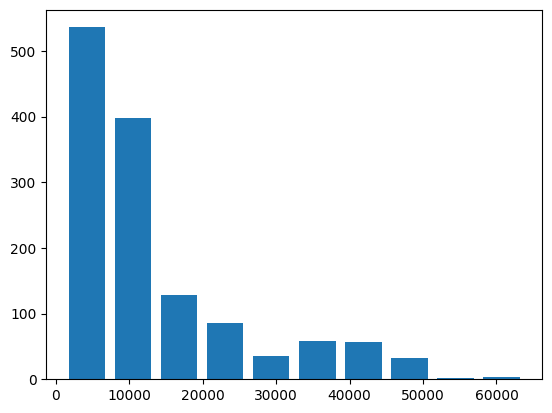

In [78]:
charges = df1['charges']
plt.hist(charges, bins = 10, rwidth=0.8)

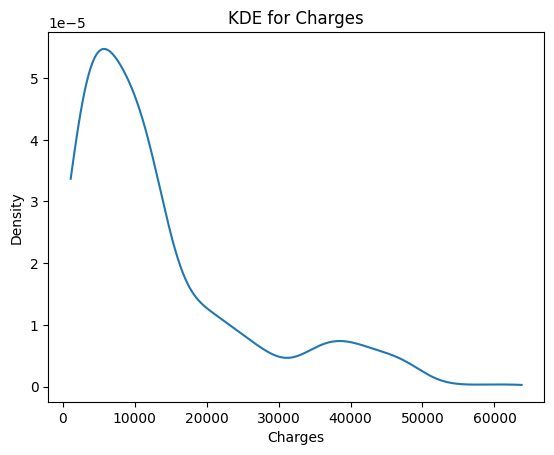

In [79]:
kernel = stats.gaussian_kde(charges)
x = np.linspace(charges.min(), charges.max(), 1000)

density = kernel(x)
fig, ax  = plt.subplots()
plt.title('KDE for Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

plt.plot(x, density)

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

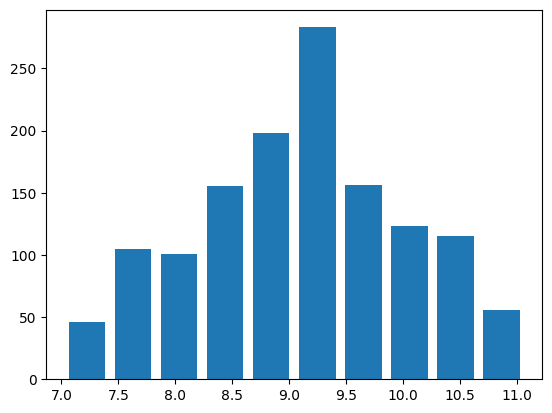

In [80]:
df2 = df.copy()
df2['logcharges'] = np.log(df2['charges'])
logcharges = df2['logcharges']

plt.hist(logcharges, bins = 10, rwidth=0.8)


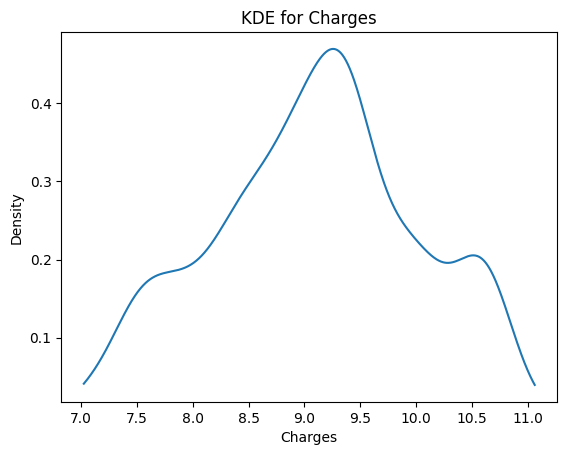

In [ ]:
kernel2 = stats.gaussian_kde(logcharges)
x2 = np.linspace(logcharges.min(), logcharges.max(), 1000)

density2 = kernel2(x2)
fig, ax  = plt.subplots()
plt.title('KDE for Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

plt.plot(x2, density2)


In [ ]:
df1['logcharges'] = np.log(df1['charges'])
df1.drop(['charges', 'ogcharges', 'Logcharges'], axis=1, inplace=True)


KeyError: 'charges'

In [107]:
df1['smoker'] = (
    df1['smoker']
    .replace({'yes': 1, 'no': 0})
    .astype(int)
)


In [108]:
df1.head()

,age,sex,bmi,children,smoker,region,logcharges
0,19,female,27.900,0,1,southwest,9.734176
1,18,male,33.770,1,0,southeast,7.453302
2,28,male,33.000,3,0,southeast,8.400538
3,33,male,22.705,0,0,northwest,9.998092
4,32,male,28.880,0,0,northwest,8.260197


In [112]:
print(df1[['smoker', 'logcharges']].corr())
print(df1[['bmi', 'logcharges']].corr())
print(df1[['children', 'logcharges']].corr())



              smoker  logcharges
smoker      1.000000    0.665506
logcharges  0.665506    1.000000
                 bmi  logcharges
bmi         1.000000    0.132669
logcharges  0.132669    1.000000
            children  logcharges
children    1.000000    0.161336
logcharges  0.161336    1.000000


C:\Users\alexa\AppData\Local\Temp\ipykernel_20256\3199425926.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[1].boxplot(


Text(0.5, 1.0, 'Boxplots of logcharges based on the smoker variable (orange is smoker)')

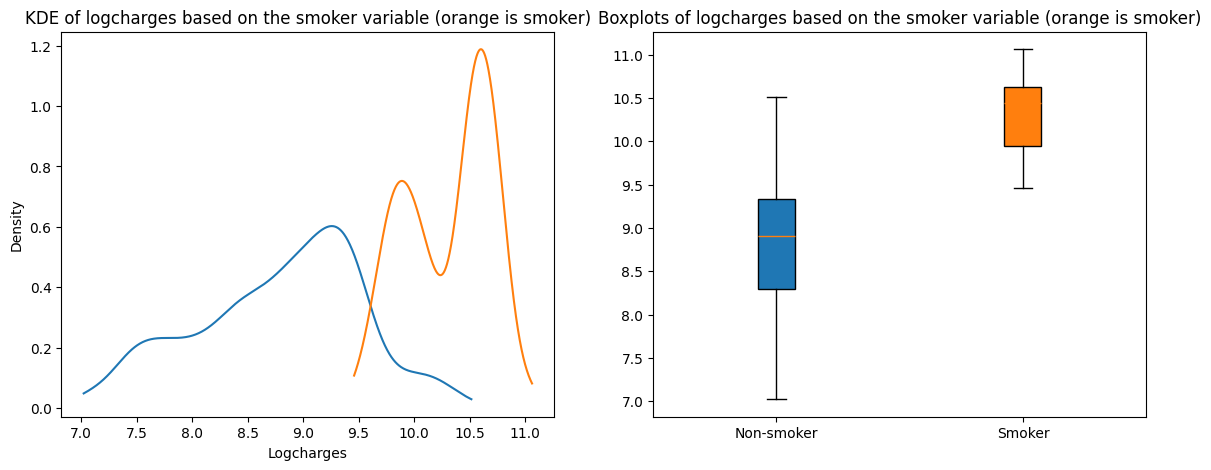

In [130]:
#Group division of logcharges according to smoker
group_nonsmoker = df1[df1['smoker'] == 0]
group_smoker = df1[df1['smoker'] == 1]

kernel_nonsmoker = stats.gaussian_kde(group_nonsmoker['logcharges'])
x_nonsmoker = np.linspace(group_nonsmoker['logcharges'].min(), group_nonsmoker['logcharges'].max(), 1000)
y_nonsmoker = kernel_nonsmoker(x_nonsmoker)

kernel_smoker = stats.gaussian_kde(group_smoker['logcharges'])
x_smoker = np.linspace(group_smoker['logcharges'].min(), group_smoker['logcharges'].max(), 1000)
y_smoker = kernel_smoker(x_smoker)

fig, axes = plt.subplots(1,2, figsize=(14, 5))

axes[0].plot(x_nonsmoker, y_nonsmoker)
axes[0].plot(x_smoker, y_smoker)
axes[0].set_xlabel('Logcharges')
axes[0].set_ylabel('Density')
axes[0].set_title('KDE of logcharges based on the smoker variable (orange is smoker)')

box = axes[1].boxplot(
    [group_nonsmoker['logcharges'], group_smoker['logcharges']],
    patch_artist=True,
    labels=['Non-smoker', 'Smoker']
)

colors = ['tab:blue', 'tab:orange']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

axes[1].set_title('Boxplots of logcharges based on the smoker variable (orange is smoker)')

We can clearly see that being a smoker shifts the density curve to the right, leading to much higer costs

We conclude that the smoker variable is going to be a huge factor